In [51]:
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")
crimes.head(n=15)



,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,...,Sector,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number
0,200939101,13047006,10/02/2013 07:52:41 PM,511,BURG FORCE-RES/NIGHT,OTHER,25700 MT RADNOR DR,DAMASCUS,MD,20872.0,...,NaN,NaN,NaN,10/02/2013 07:52:00 PM,NaN,NaN,NaN,OTHER,NaN,25700.0
1,200952042,13062965,12/31/2013 09:46:58 PM,1834,CDS-POSS MARIJUANA/HASHISH,GERMANTOWN,GUNNERS BRANCH RD,GERMANTOWN,MD,20874.0,...,M,5M1,470.0,12/31/2013 09:46:00 PM,NaN,NaN,NaN,5D,NaN,NaN
2,200926636,13031483,07/06/2013 09:06:24 AM,1412,VANDALISM-MOTOR VEHICLE,MONTGOMERY VILLAGE,OLDE TOWNE AVE,GAITHERSBURG,MD,20877.0,...,P,6P3,431.0,07/06/2013 09:06:00 AM,NaN,NaN,NaN,6D,NaN,NaN
3,200929538,13035288,07/28/2013 09:13:15 PM,2752,FUGITIVE FROM JUSTICE(OUT OF STATE),BETHESDA,BEACH DR,CHEVY CHASE,MD,20815.0,...,D,2D1,11.0,07/28/2013 09:13:00 PM,NaN,NaN,NaN,2D,NaN,NaN
4,200930689,13036876,08/06/2013 05:16:17 PM,2812,DRIVING UNDER THE INFLUENCE,BETHESDA,BEACH DR,SILVER SPRING,MD,20815.0,...,D,2D3,178.0,08/06/2013 05:16:00 PM,NaN,NaN,NaN,2D,NaN,NaN
5,200931009,13037095,08/07/2013 11:31:19 PM,1864,CDS IMPLMNT-MARIJUANA/HASHISH,MONTGOMERY VILLAGE,N270 CUTOVR X8 TO X9 HWY,GAITHERSBURG,MD,NaN,...,P,6P1,444.0,08/07/2013 11:31:00 PM,NaN,NaN,NaN,6D,NaN,NaN
6,200931987,13037600,08/10/2013 07:52:08 PM,1833,CDS-POSS COCAINE& DERIVATIVES,MONTGOMERY VILLAGE,SAM EIG HWY,ROCKVILLE,MD,20877.0,...,P,6P2,660.0,08/10/2013 07:52:00 PM,NaN,NaN,NaN,6D,NaN,NaN
7,200936488,13043769,09/15/2013 06:56:49 AM,2791,ALL OTHER NON-TRAFFIC CRIM OFFENSES,MONTGOMERY VILLAGE,WOODFIELD RD,WASHINGTON GROVE,MD,20877.0,...,P,6P3,419.0,09/15/2013 06:40:00 AM,NaN,NaN,NaN,6D,NaN,NaN
8,200938488,13046321,09/29/2013 12:44:15 AM,2812,DRIVING UNDER THE INFLUENCE,ROCKVILLE,WOOTTON PKW,ROCKVILLE,MD,20852.0,...,A,1A1,263.0,09/29/2013 12:44:00 AM,NaN,NaN,NaN,1D,NaN,NaN
9,200939746,13047878,10/07/2013 11:39:48 PM,2812,DRIVING UNDER THE INFLUENCE,ROCKVILLE,WOOTTON PKW,ROCKVILLE,MD,20850.0,...,A,1A1,260.0,10/07/2013 11:39:00 PM,10/08/2013 12:30:00 AM,NaN,NaN,1D,NaN,NaN


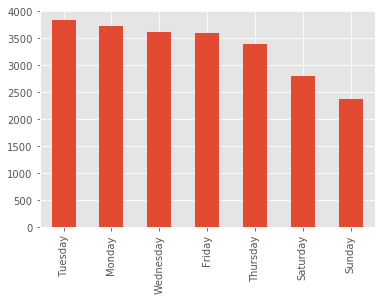

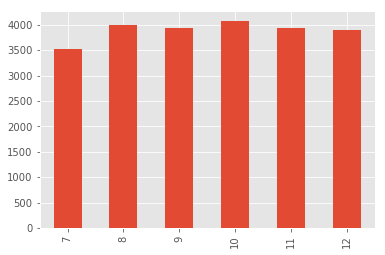

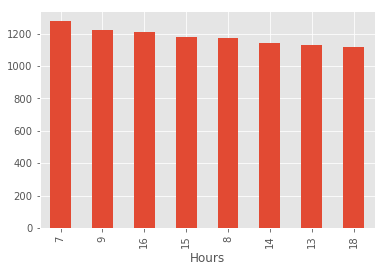

In [74]:
d_time = pd.to_datetime(crimes["Dispatch Date / Time"])
week = d_time.dt.weekday_name.value_counts(sort = True) #Counting week days crimes
month = d_time.dt.month.value_counts(sort = False) #Counting months crimes
day = d_time.dt.day.value_counts(sort = False)
hour = d_time.dt.hour.value_counts(sort = True)



week.plot.bar()
plt.show()
month.plot.bar()
plt.show()

hour_plot = hour[0:8].plot.bar()
hour_plot.set_xlabel("Hours")
fig = plt.figure(figsize=(15,5))
fig.set_size_inches(18.5, 10.5, forward=True)

plt.show()
#day.plot.bar()

Tuesday      3836
Monday       3734
Wednesday    3611
Friday       3594
Thursday     3404
Saturday     2807
Sunday       2383
Name: Dispatch Date / Time, dtype: int64
7     3520
8     4002
9     3927
10    4075
11    3941
12    3904
Name: Dispatch Date / Time, dtype: int64
16    801
1     729
17    811
2     810
18    773
3     796
19    817
4     761
20    780
5     817
21    776
6     748
22    782
7     684
23    894
8     693
24    720
9     799
25    700
10    688
26    754
11    735
27    740
12    800
28    655
13    757
29    740
14    670
30    832
15    740
31    567
Name: Dispatch Date / Time, dtype: int64
7     1278
9     1222
16    1211
15    1179
8     1174
14    1142
13    1132
18    1119
10    1116
17    1115
11    1105
6     1076
20    1065
12    1063
23    1039
19    1030
22    1022
21    1012
0      904
1      855
2      684
3      376
4      228
5      222
Name: Dispatch Date / Time, dtype: int64


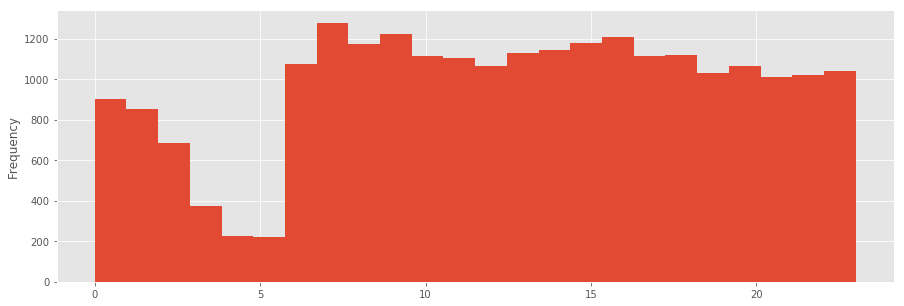

In [78]:
d_time = pd.to_datetime(crimes["Dispatch Date / Time"])
week = d_time.dt.weekday_name.value_counts(sort = True) #Counting week days crimes
month = d_time.dt.month.value_counts(sort = False) #Counting months crimes
day = d_time.dt.day.value_counts(sort = False)
hour = d_time.dt.hour.value_counts(sort = True)

print(week)
print(month)
print(day)
print(hour)


plt.figure(figsize=(15,5));
histplot = d_time.dt.hour.plot.hist(stacked=False, bins=24)
plt.show()
fig = histplot.get_figure()
fig.savefig("total-sales.png")